# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [19]:
# Your code here.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

Draw a dispersion diagram (scatter plot) for the data.

In [2]:
# Your code here.
students = pd.DataFrame({'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})
students

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

<AxesSubplot:xlabel='Age', ylabel='Tardies'>

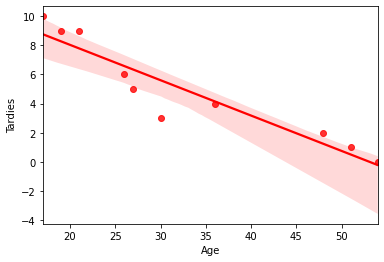

In [25]:
# Your response here. 
sns.regplot(x=students["Age"], y=students["Tardies"],color = "red")

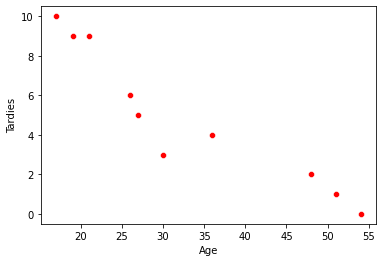

In [26]:
#other option
ax = sns.scatterplot(x="Age", y="Tardies", data=students,color = "red")

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [14]:
# Your response here.
#correlation:
students.corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


In [ ]:
'''
Correlation is a statistic that measures the degree to which two variables move in relation to each other.
On the other hand, covariance is a measure of the joint variability of two random variables.
To further elaborate:
Covariance is nothing but a measure of correlation. Correlation refers to the scaled form of covariance. 
Covariance indicates the direction of the linear relationship between variables. 
Correlation on the other hand measures both the strength and direction of the linear relationship between two variables.
'''

In [ ]:
# Your response here.


In [15]:
#covariance:
students.cov()

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


In [ ]:
'''
Correlation is pointoing to a relationship of the degree of change in the variable itself, 
meanwhile covariance relations the magnitude of one variable against the variance in the other one to such values
'''

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [18]:
# Your code here.
X = students['Age']
Y = students['Tardies']
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))
print ('The error is: ' + str(std_err))

The slope is: -0.2428207709159808
The intercept is: 12.888803363135768
The error is: 0.03139728816158607


Plot your regression model on your scatter plot.

In [20]:
# Your code here.
X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Sat, 17 Apr 2021   Prob (F-statistic):           5.57e-05
Time:                        17:51:51   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.000      10.328      15.450
Age           -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

<AxesSubplot:xlabel='Age', ylabel='Tardies'>

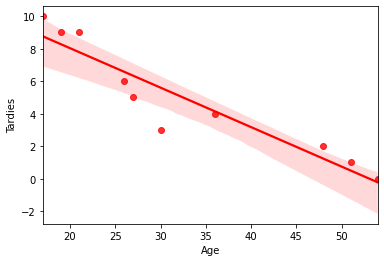

In [24]:
# Your response here. 
sns.regplot(x='Age', y='Tardies', data=students, color = "red")

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [29]:
# Import any libraries you may need & the data
vehicle = pd.read_csv('vehicles.csv') 

vehicle.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [33]:
# Your response here. 
vehicle1 = df[['Year','Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year','CO2 Emission Grams/Mile']]

cor_matrix = vehicle1.corr()

'\nThe most relevant variables to determine CO2 emissions are Fuel Barrels/Year.\nThe least amount of helpful information for determining CO2 emissions is provided by the year variable\n'

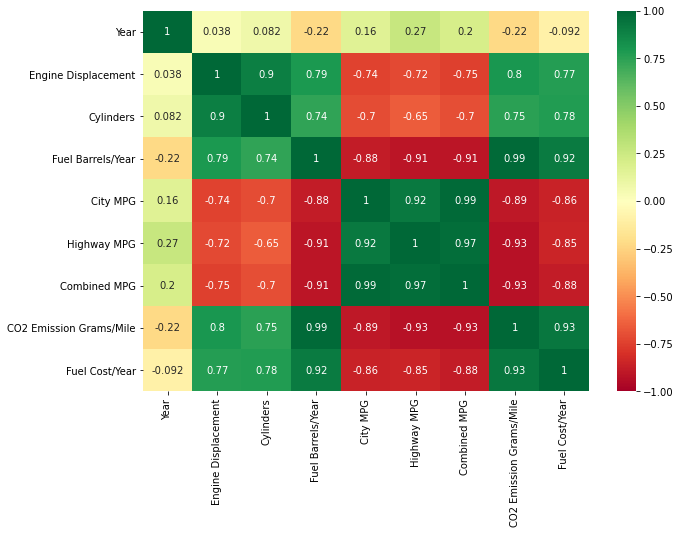

In [37]:
Y = vehicle['CO2 Emission Grams/Mile']
X = vehicle[['Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year']]

fig, ax = plt.subplots(figsize = (10,7))
sns.heatmap(vehicle.corr(), cmap = plt.cm.RdYlGn, ax = ax, vmin = -1, vmax = 1, annot=True);

'''
The most relevant variables to determine CO2 emissions are Fuel Barrels/Year.
The least amount of helpful information for determining CO2 emissions is provided by the year variable
'''

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [38]:
# Your response here. 
Y = vehicle['CO2 Emission Grams/Mile']
X = vehicle[['Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year']]
X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Sat, 17 Apr 2021   Prob (F-statistic):               0.00
Time:                             17:59:28   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               769.8883     19.392     39.702      0.000     731.880     807.897
Year                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders             1.8788      0.083     22.598      0.000       1.716       2.042
Fuel Barrels/Year    19.0529      0.061    311.600      0.000      18.933      19.173
Combined MPG         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Fuel Cost/Year        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your response here. 
'''
Based on the R-squared 98% of the variability of CO2 Emission Grams/Mile is explained by a variation of the 5 predictor variables, 
therefore the model is a very good fit to predict our Y.
Fuel Cost/Year has the closest coefficient to zero so it has no relevance on the variability of CO2 Emission Grams/Mile. 
Hence, it may be left out of the model.
Moreover, Fuel Barrels/Year and Combined MPG have respectively the strongest positive and negative correlation, 
thus are the best predictor variables for variability of CO2 emissions
'''

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [40]:
# Your code here.
parties = pd.DataFrame({'Invited':   [1,3,4,6,8,9,11,14],
                             'Attended': [1,2,4,4,5,7,8 ,13]})
parties

,Invited,Attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

<AxesSubplot:xlabel='Invited', ylabel='Attended'>

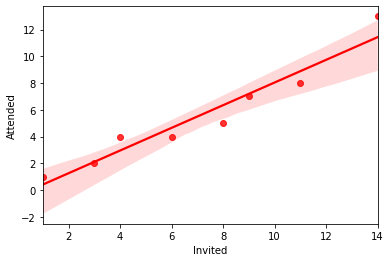

In [42]:
# Your code here.
sns.regplot(x="Invited", y="Attended", data=parties, color = "red")

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [43]:
# Your response here. 
Y = parties['Invited']
X = parties['Attended']
X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Invited   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Sat, 17 Apr 2021   Prob (F-statistic):           0.000102
Time:                        18:02:00   Log-Likelihood:                -11.831
No. Observations:                   8   AIC:                             27.66
Df Residuals:                       6   BIC:                             27.82
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9608      0.796      1.207      0.273      -0.987       2.909
Attended       1.0980      0.121      9.045      0.000       0.801       1.395
==============================================================================
Omnibus:                        1.930   Durbin-Watson:                   1.719
Prob(Omnibus):                  0.381   Jarque-Bera (JB):                0.742
Skew:                           0.048   Prob(JB):                        0.690
Kurtosis:                       1.511   Cond. No.                         12.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

<AxesSubplot:xlabel='Invited'>

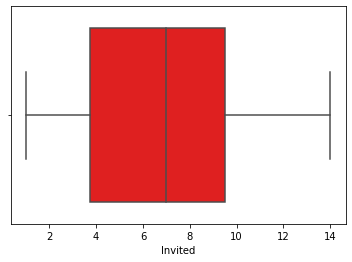

In [45]:
# Your response here. 
sns.boxplot(x=parties['Invited'], color = "red")

<AxesSubplot:xlabel='Attended'>

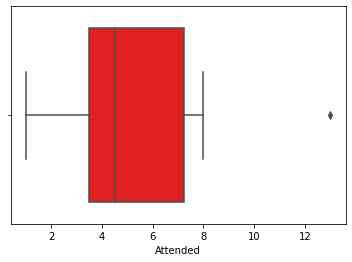

In [46]:
sns.boxplot(x=parties['Attended'], color = "red")

In [47]:
parties2 = parties.drop([7])
parties2

,Invited,Attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8


<AxesSubplot:xlabel='Invited', ylabel='Attended'>

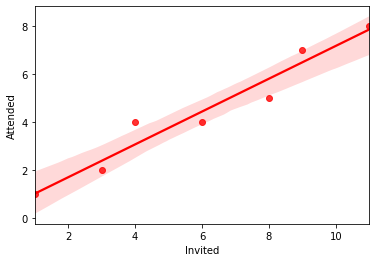

In [48]:
sns.regplot(x="Invited", y="Attended", data=parties2, color = "red")

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [49]:
# Your response here. 
Y = parties2['Invited']
X = parties2['Attended']
X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Invited   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     83.31
Date:                Sat, 17 Apr 2021   Prob (F-statistic):           0.000264
Time:                        18:03:47   Log-Likelihood:                -8.2295
No. Observations:                   7   AIC:                             20.46
Df Residuals:                       5   BIC:                             20.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1061      0.755     -0.140      0.894      -2.048       1.835
Attended       1.3788      0.151      9.127      0.000       0.990       1.767
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.634
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.200
Skew:                          -0.282   Prob(JB):                        0.905
Kurtosis:                       2.394   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""